# Mouse Experiment

In this Kernel i will classify the Mouse Dataset to verify that a machine can defferentiate between 3 different speeds using mouse as an input device

First i will start by uploading the dataset to colaboratory to be able to use it later.

In [1]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis

Now i will import the data to my data frame to be able to explore it later. I will be exploring :

1.   Some statistics about the dataset like the number of classes, the number of features ...
2.   Correlations between features
3.   Number of outliers based on the zscore


In [2]:
import io

data = pd.read_csv("C:\\Users\\Moghazy\\Desktop\\data1.csv")

In [3]:
data.head()

,Unnamed: 0,InvertedMouseY,NumberInBlock,direction,greenX0,greenX1,greenY0,greenY1,index,mouseX,mouseY,redX0,redX1,redY0,redY1,speed,timeMilSec,trialIdx,user
0,1,57.0,0.0,0.0,640.0,640.0,320.0,760.0,17596.0,728.0,57.0,1280.0,1280.0,320.0,760.0,0.0,93.0,450.0,0.0
1,1,28.0,1.0,0.0,640.0,640.0,320.0,760.0,9963.0,561.0,28.0,1280.0,1280.0,320.0,760.0,0.0,172.0,451.0,0.0
2,1,55.0,10.0,0.0,640.0,640.0,320.0,760.0,11235.0,657.0,55.0,1280.0,1280.0,320.0,760.0,0.0,733.0,460.0,0.0
3,1,44.0,11.0,0.0,640.0,640.0,320.0,760.0,9539.0,628.0,44.0,1280.0,1280.0,320.0,760.0,0.0,390.0,461.0,0.0
4,1,95.0,12.0,0.0,640.0,640.0,320.0,760.0,9327.0,652.0,95.0,1280.0,1280.0,320.0,760.0,0.0,577.0,462.0,0.0


From the data i have and the problem that i am trying to solve, It seems that the distance between the two lines can be of great benefit to out model.
distance = sqrt(x^2 + y^2)

In [4]:
data['distance'] = ( data['mouseX']**2 + data['InvertedMouseY']**2 ) ** 0.5

I will drop some data that are of no use for me

In [5]:
data.drop(["mouseY", "greenX0", "greenX1", "greenY0", "greenY1", "redX0","redX1", "redY0", "redY1", "Unnamed: 0"], axis = 1, inplace = True)

Now i will explore the relation between some features by plotting the two features aganist each others to see if i can differentiate between different classes by adding combination between those two features

In [6]:
import matplotlib.pyplot as plt
classes = np.array(list( ((data.speed).astype("int32")).values))

def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10 )
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(20,20))
f.add_subplot(331)
plotRelation(data.distance, data.trialIdx)
f.add_subplot(332)
plotRelation(data.distance, data.timeMilSec)
f.add_subplot(333)
plotRelation(data.distance, data.direction)
f.add_subplot(334)
plotRelation(data.mouseX, data.InvertedMouseY)
f.add_subplot(335)
plotRelation(data.distance, data.index)
f.add_subplot(336)
plotRelation(data.trialIdx, data.index)


Now it is time to add some of the combinations

In [7]:
data['ti'] = data["trialIdx"] + data["index"]
data['dtr'] = data["distance"] + data["trialIdx"]

In [8]:
data["user"] = data["user"].astype("int32")
unique, count= np.unique(data["user"], return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {0: 1080, 1: 1080, 2: 1079, 3: 1079, 4: 1079, 5: 1080, 6: 1080, 7: 1080, 8: 1079, 9: 1079, 10: 1080}  



It is time to explore some statistics about the data

In [9]:
data.describe()

,InvertedMouseY,NumberInBlock,direction,index,mouseX,speed,timeMilSec,trialIdx,user,distance,ti,dtr
count,11875.000000,11875.000000,11875.000000,1.187500e+04,11875.000000,11875.000000,11875.000000,11875.000000,11875.000000,11875.000000,1.187500e+04,11875.000000
mean,235.381221,14.501811,1.499621,1.604309e+04,345.932211,0.999663,974.835200,539.558653,4.999916,547.973137,1.658265e+04,1087.531789
std,217.203858,8.655783,1.118119,4.862862e+04,334.084477,0.816497,2797.712501,311.803026,3.162557,183.243729,4.861170e+04,357.101229
min,0.000000,0.000000,0.000000,1.100000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.310000e+02,3.000000
25%,23.000000,7.000000,0.000000,4.208000e+03,24.000000,0.000000,78.000000,270.000000,2.000000,438.894065,4.773500e+03,806.933097
50%,118.000000,15.000000,1.000000,8.051000e+03,134.000000,1.000000,374.000000,540.000000,5.000000,556.089921,8.540000e+03,1074.037404
75%,439.000000,22.000000,2.000000,1.746550e+04,640.000000,2.000000,1045.000000,810.000000,8.000000,642.545329,1.799950e+04,1368.246897
max,760.000000,29.000000,3.000000,3.733251e+06,1280.000000,2.000000,242705.000000,1079.000000,10.000000,1357.012159,3.733641e+06,2327.114314


For some reasons timeMilSec that must be positive for all time has some negative and zero values

In [10]:
data.timeMilSec[data.timeMilSec <= 0] = np.nan
data.dropna(inplace = True, axis = 0)


C:\Users\Moghazy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Sinde we are classifing the speeds it will be promesing to have the actual speed by dividing the distance over the time

In [11]:
data["timeMilSec"] = data.timeMilSec=data.timeMilSec.map(lambda x: 1 if np.isinf(x) else x)
data['actual_speed'] = data['distance'].divide(data["timeMilSec"])
# data['mean_speed'] = data.groupby('user')['actual_speed'].transform(lambda x : x.mean())

# Outlier Detection
Now i will explore the outliers in the dataset. I will explore the outliers in the most important columns likeTime, Distance and Actual Speed

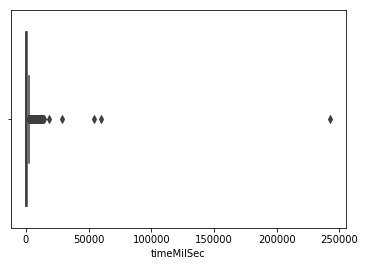

In [12]:
import seaborn as sns
sns.boxplot(x=data['timeMilSec'])

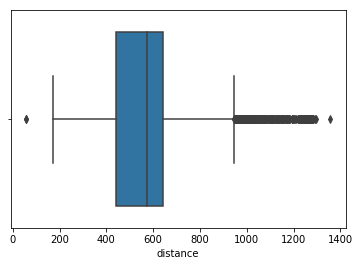

In [13]:
sns.boxplot(x=data['distance'])

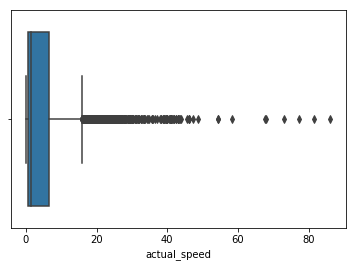

In [14]:
sns.boxplot(x=data['actual_speed'])

Now let's Explore the number of outliers in the dataset according to the zscore. I will count the numbers greater than 3 std.

In [15]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data))

In [16]:
zee = (np.where(z > 3))[1]

print("number of data examples greater than 3 standard deviations = %i " % len(zee))

number of data examples greater than 3 standard deviations = 579 


It is time to discover the correlations between features(variables) in the dataset, I will use Heatmap for visualization.

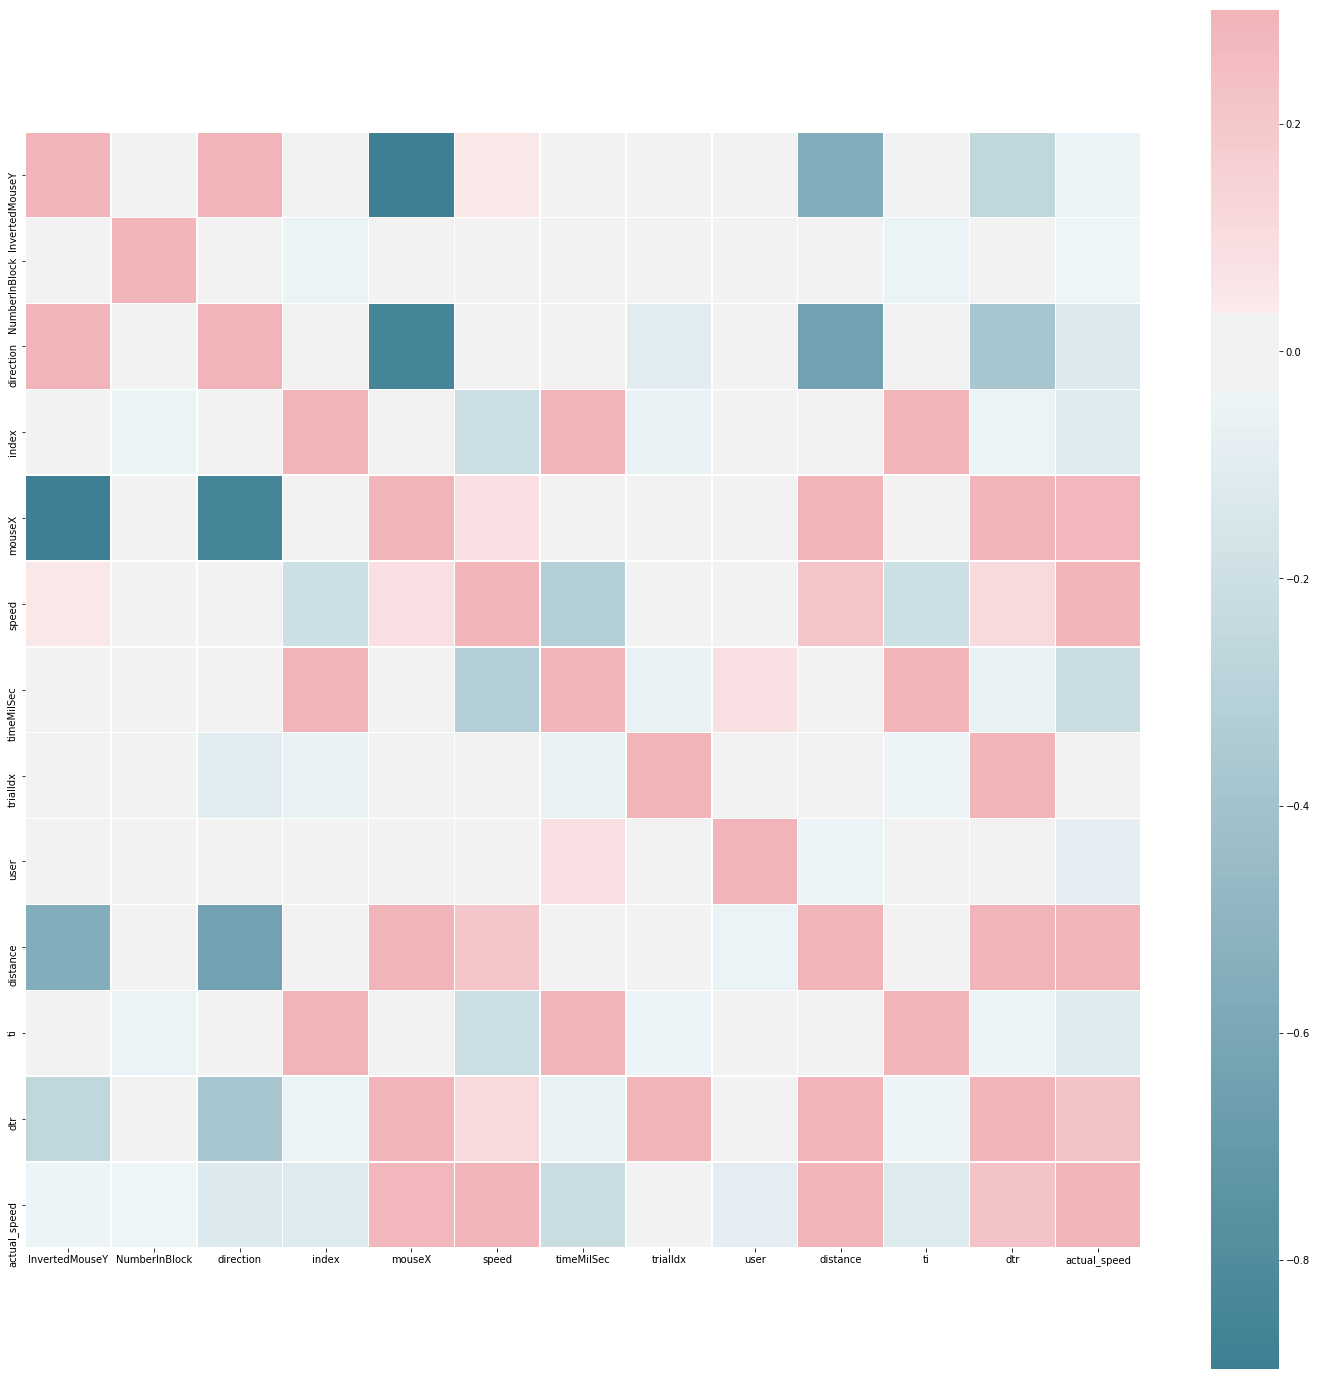

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

Let's see if there are any null values in the dataset that are resulted from division operations or machine fault.

In [18]:
data.isna().sum()
print("Number of NaNs in each column :\n")
np.isinf(data).sum()

Number of NaNs in each column :



InvertedMouseY    0
NumberInBlock     0
direction         0
index             0
mouseX            0
speed             0
timeMilSec        0
trialIdx          0
user              0
distance          0
ti                0
dtr               0
actual_speed      0
dtype: int64

Now i will try to know more about the distribution of data points for each feature.

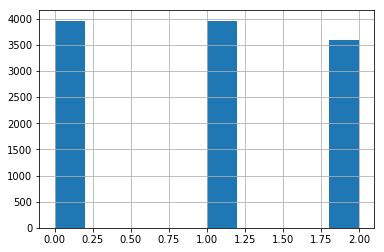

In [19]:
data["speed"].hist()

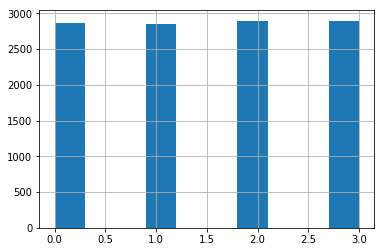

In [20]:
data["direction"].hist()

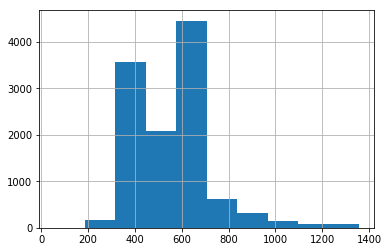

In [21]:
data["distance"].hist()

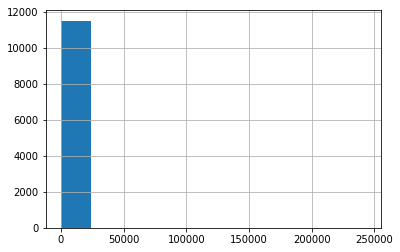

In [22]:
data["timeMilSec"].hist()

It is time to split the training data from the label or target

In [23]:
from sklearn.model_selection import train_test_split
x = data.drop(['speed'], axis = 1)
y = data['speed'].astype("int32")
print( y.head() )

x_train, x_test, y_train, y_test = train_test_split( x.values, y.values, test_size=0.2, random_state=42 )

0    0
1    0
2    0
3    0
4    0
Name: speed, dtype: int32


Here i will count the number of occurance of each target class to know which metric to use to measure performance.

In [24]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {0: 3177, 1: 3139, 2: 2889}  



# Algorithm choice and optmization
Since the Dataset is not large, I will use Ensemble Learninig with ExtraTree Classifier. I will optmize the results using gridsearch to choose the best Hyper Parameter

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#uncomment the commented code and uncomment the commented to perform gridsearchCV

clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

# clf.fit(x_train, y_train)
# print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
# print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

n_estimators = np.linspace(start = 600 , stop = 1000, num = 8, dtype= int )
n_estimators = [500, 550, 600, 650, 700, 750, 800 , 850, 900, 950]

param_grid = {'n_estimators': n_estimators}
grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test, y_test) * 100 ) )

C:\Users\Moghazy\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The best parameters are {'n_estimators': 950} with a score of 97
Best estimator accuracy on test set 97.44 


Now i will draw the training vs testing scores to visualize the result from the estimator as i increase the number of estimators in the extra tree classifiers

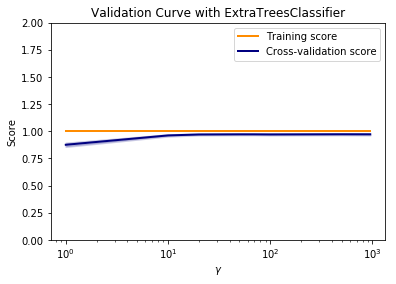

In [26]:
from sklearn.model_selection import validation_curve

param_range = [1, 10, 20, 50, 70, 100, 500, 950]

train_scores, test_scores = validation_curve( clf , x_train, y_train, param_name="n_estimators", param_range=param_range,cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with ExtraTreesClassifier")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 2)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()